In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

from Net import Net
from OverwriteForgetNet import OverwriteForgetNet
from RandomForgetNet import RandomForgetNet

In [2]:
def evolution_correlation(net, dt, nsteps):
    net.train_random()
    
    stimulus = np.random.normal(size=net.N)
    net.set_init_state(stimulus)
    
    state_evolution = [net.step(stimulus, dt) for _ in range(nsteps)]
    
    return np.corrcoef(state_evolution)

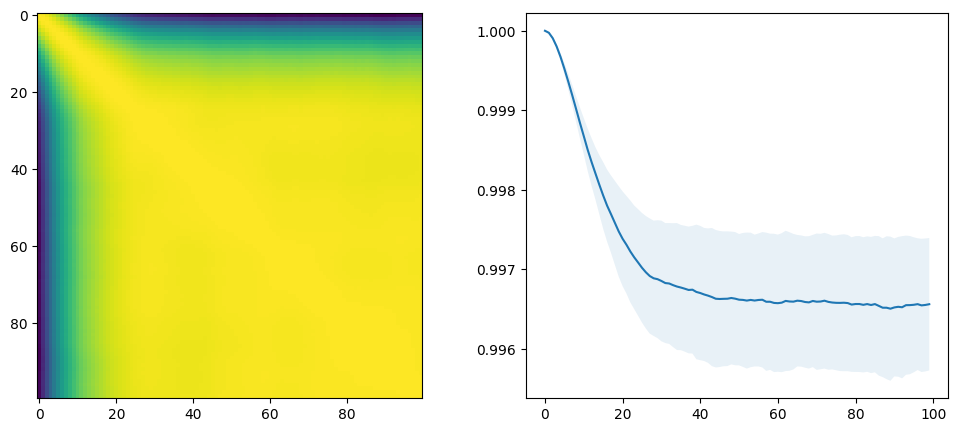

In [3]:
N = 100
eigenval_norm = .85
noise_std = 1.

net = Net(N, eigenval_norm, noise_std)
random_net = RandomForgetNet(N, eigenval_norm, noise_std, mu=0., sigma=10., omega=0.01)
overwrite_net = OverwriteForgetNet(N, eigenval_norm, noise_std, gamma=0.1)

dt = 0.01
nsteps = 100
ntrials = 10
correlation_matrices = [evolution_correlation(overwrite_net, dt, nsteps) for _ in range(ntrials)]

correlation_mat_mean = np.mean(correlation_matrices, axis=0)
correlation_mat_std = np.std(correlation_matrices, axis=0)

_, axs = plt.subplots(ncols=2, figsize=(12,5))    
axs[0].imshow(correlation_mat_mean)
axs[1].plot(range(nsteps), correlation_mat_mean[0,:])
axs[1].fill_between(range(nsteps),
                    correlation_mat_mean[0,:] - correlation_mat_std[0,:],
                    correlation_mat_mean[0,:] + correlation_mat_std[0,:],
                    alpha=0.1)
plt.show()